# Smart Symptom Classifier

**Objective:** Train a machine learning model to classify diseases based on symptoms using a public dataset. This notebook handles preprocessing, binary symptom encoding, model training, and evaluation.

In [74]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### **Data Preprocessing & Feature Engineering**

In [ ]:
df = pd.read_csv("dataset.csv")

symptom_cols = [col for col in df.columns if col.lower().startswith("symptom")]

all_symptoms = sorted(set(
    s.strip().replace(" ", "_").lower()
    for col in symptom_cols
    for s in df[col].dropna().unique()
))

for symptom in all_symptoms:
    df[symptom] = df[symptom_cols].apply(
        lambda row: int(symptom in [str(x).strip().replace(" ", "_").lower() for x in row if pd.notna(x)]),
        axis=1
    )

X = df[all_symptoms]
y = df["Disease"]

joblib.dump(all_symptoms, "all_symptoms.pkl")

### **Model Building**

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "rf_structured.pkl")

joblib.dump(list(model.classes_), "class_names.pkl")

y_pred_rf = model.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc:.2f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=model.classes_))


Random Forest Accuracy: 1.00

Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        30
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        30
                              Arthritis       1.00      1.00      1.00        30
                       Bronchial Asthma       1.00      1.00      1.00        30
                   Cervical spondylosis       1.00      1.00      1.00        30
                            Chicken pox       1.00      1.00      1.00        30
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00    

### **Observations**

/var/folders/rv/7cct68893d521n2s4s64d6m40000gn/T/ipykernel_5897/2186942748.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


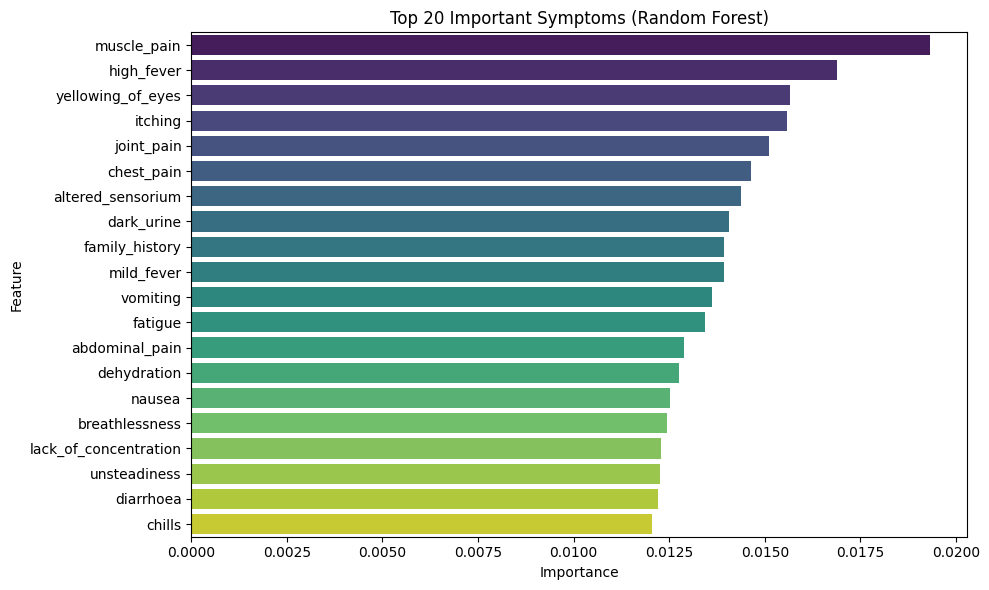

In [79]:
importances = model.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Top 20 Important Symptoms (Random Forest)")
plt.tight_layout()
plt.show()

/Users/sarahlamond/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


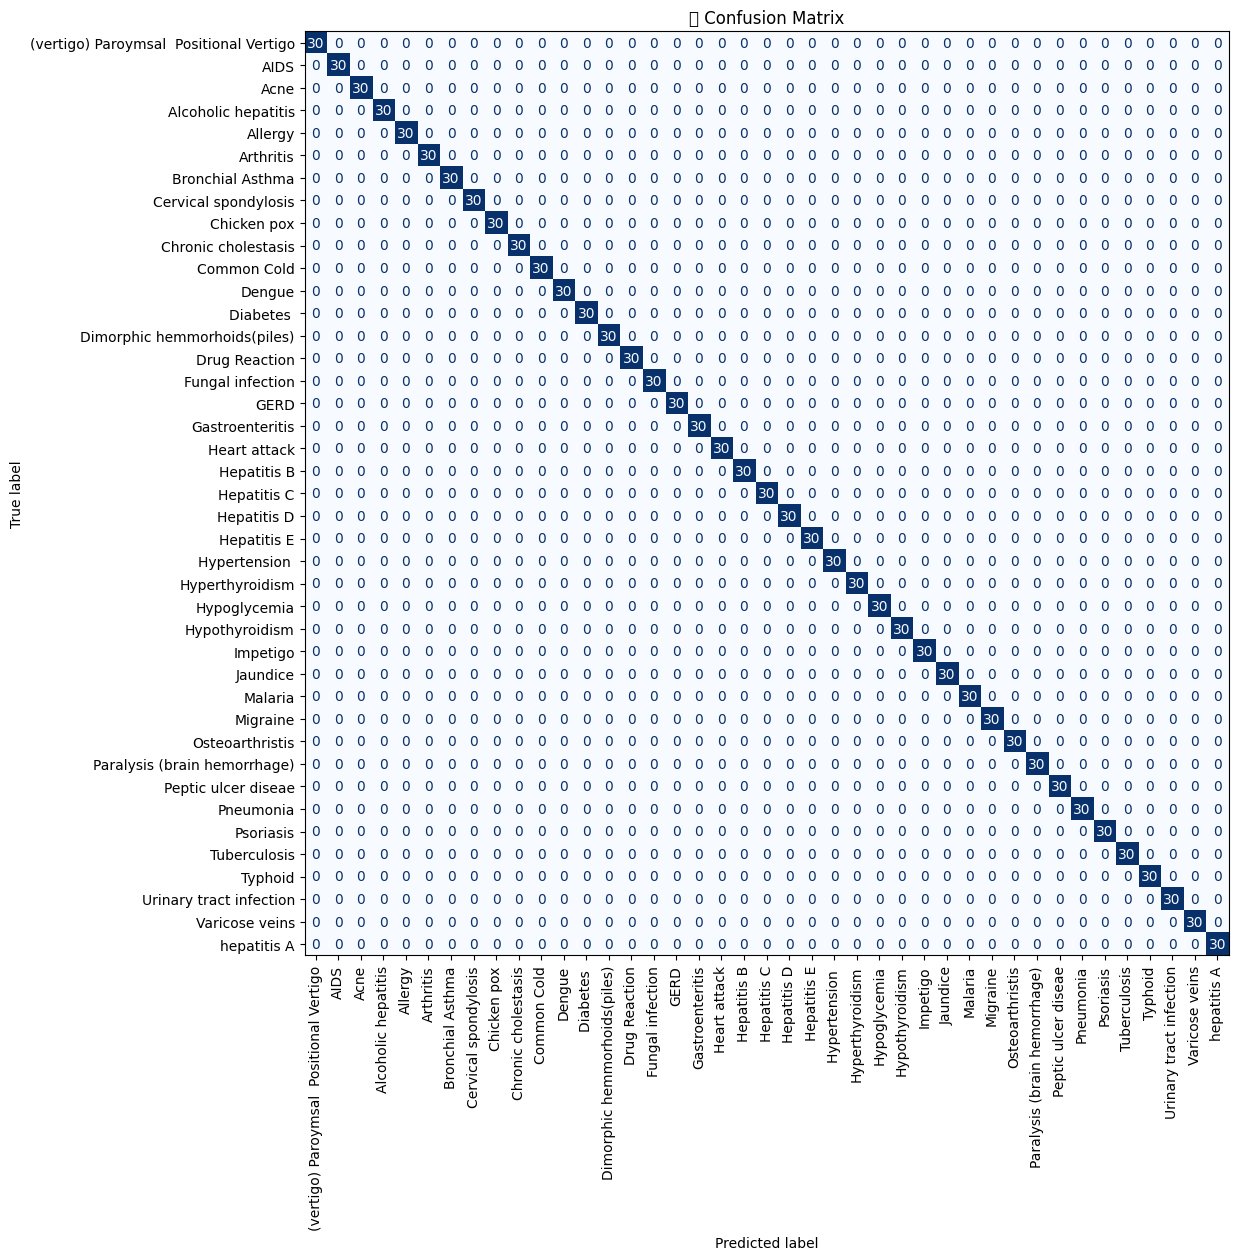

In [80]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")
plt.show()

In [82]:
from sklearn.metrics import accuracy_score

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))

Train Accuracy: 1.0
Test Accuracy: 1.0


### **Conclusion & Key Insights**

The Smart Symptom Classifier model achieved 100% accuracy on both the training and test datasets which included perfect precision, recall, and F1-scores across all 41 disease classes.

While this may initially appear impressive, it actually highlights a limitation of the dataset:

**Why 100% Accuracy Is (Probably) Too Good to Be True:**
- The dataset is **synthetic and overly structured**: each disease has a unique set of symptoms.
- There's no natural overlap or variation in symptom presentation, which is unrealistic in actual medical settings.
- The model essentially performs a look-up match based on binary-encoded symptom patterns.

As a result, any simple classifier like a Random Forest or Logistic Regression is able to memorize the dataset with ease.